<a href="https://colab.research.google.com/github/adnajihad/word-cloud/blob/main/WordCloud_1301170242.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary lib

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Getting necessary files

In [2]:
!git clone https://github.com/adnajihad/word-cloud

fatal: destination path 'word-cloud' already exists and is not an empty directory.


Extracting dataset

In [3]:
!pip install pyunpack
!pip install patool

from pyunpack import Archive

Archive('/content/word-cloud/winemag-data-130k-v2.csv.rar').extractall('/content')

Reading dataset

In [4]:
df = pd.read_csv('/content/winemag-data-130k-v2.csv/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Showing dataset detailed information

In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()), ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()), ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 14 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [6]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


Grouping data

In [7]:
country = df.groupby("country")
country.describe().head()

Unnamed: 0                ...  price        
                            count          mean  ...    75%     max
country                                          ...               
Argentina                  3800.0  65075.723158  ...  25.00   230.0
Armenia                       2.0  37158.000000  ...  14.75    15.0
Australia                  2329.0  65037.539287  ...  38.00   850.0
Austria                    3345.0  65614.296861  ...  36.50  1100.0
Bosnia and Herzegovina        2.0  56613.000000  ...  12.75    13.0

[5 rows x 24 columns]

Showing top 5 countries with highest average points

In [8]:
country.mean().sort_values(by="points",ascending=False).head()

,Unnamed: 0,points,price
country,,,
England,72597.756757,91.581081,51.681159
India,68964.000000,90.222222,13.333333
Austria,65614.296861,90.101345,30.762772
Germany,65787.590762,89.851732,42.257547
Canada,70582.365759,89.369650,35.712598


Visualizing data

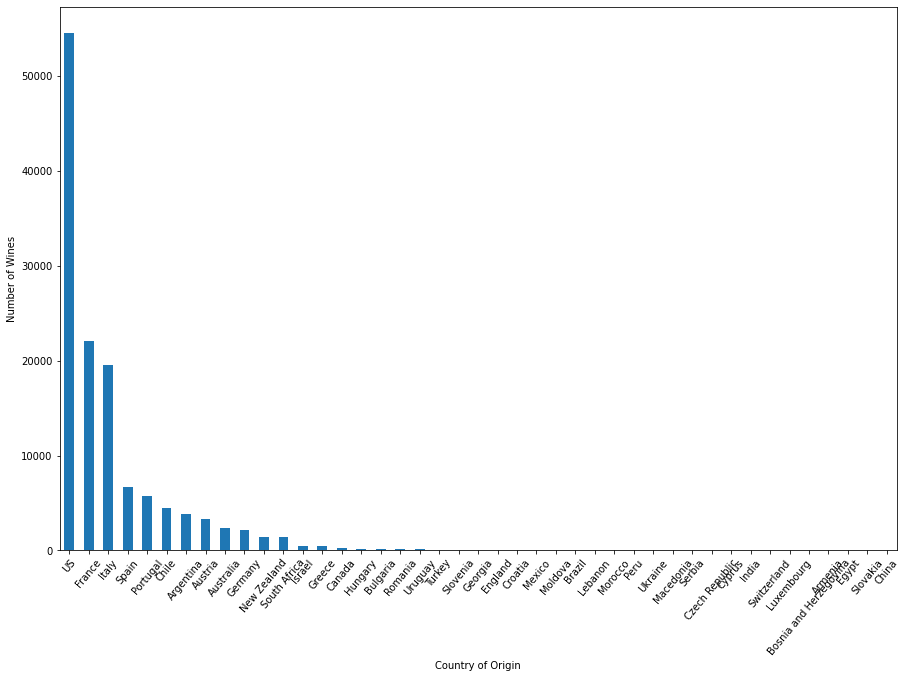

In [9]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

Plotting data by its highest point of wines

In [10]:
# plt.figure(figsize=(15,10))
# country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
# plt.xticks(rotation=50)
# plt.xlabel("Country of Origin")
# plt.ylabel("Highest point of Wines")
# plt.show()

Generating simple wordcloud

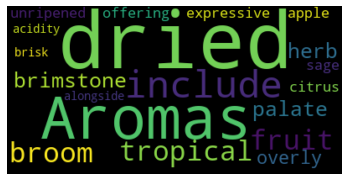

In [11]:
text = df.description[0]
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Generating another wordcloud with some style

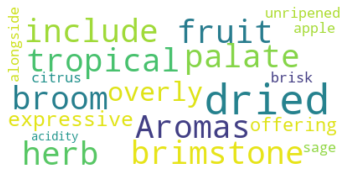

In [12]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Saving wordcloud into a image file

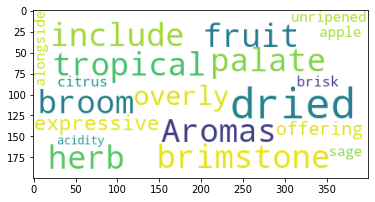

In [13]:
wordcloud.to_file("first_review.png")

import matplotlib.image as mpimg 

img = mpimg.imread('first_review.png') 
plt.imshow(img)

Combining all word in the dataset into one textline

In [14]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


Creating wordcloud to see the most common characteristics

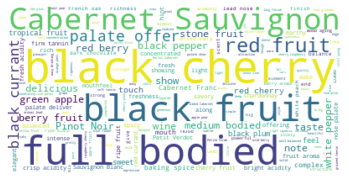

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Converting image into array form

In [16]:
wine_mask = np.array(Image.open("/content/word-cloud/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Transforming the array mask into a viable format

In [17]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

transformed_wine_mask 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

Creating a wordcloud with the transformed mask

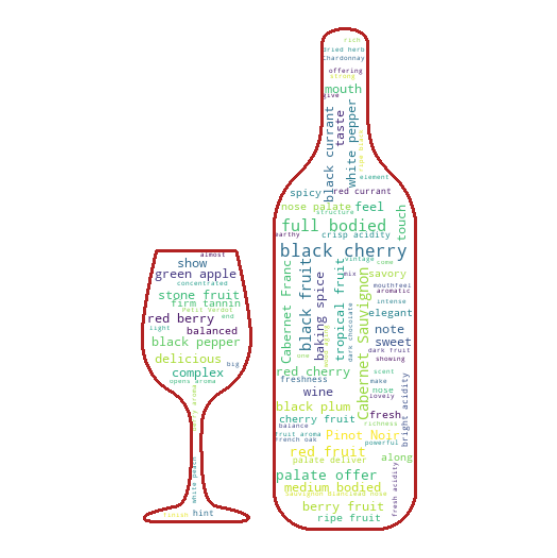

In [18]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask, 
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

wc.generate(text)
wc.to_file("wine.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Top 5 countries who have the most wines form the dataset

In [19]:
country.size().sort_values(ascending=False).head()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

Combining each country reviews

In [20]:
usa = " ".join(review for review in df[df["country"]=="US"].description)
fra = " ".join(review for review in df[df["country"]=="France"].description)
ita = " ".join(review for review in df[df["country"]=="Italy"].description)
spa = " ".join(review for review in df[df["country"]=="Spain"].description)
por = " ".join(review for review in df[df["country"]=="Portugal"].description)

Creating a wordcloud with US flag

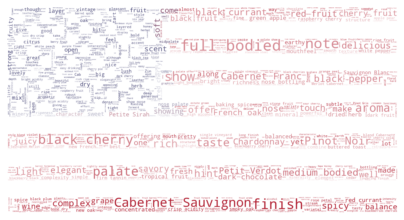

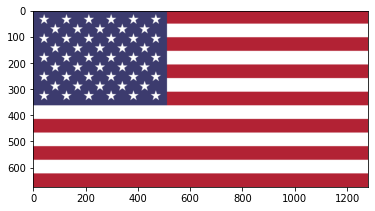

In [21]:
mask = np.array(Image.open("/content/word-cloud/us.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("us_wine.png", format="png")
plt.show()

us = mpimg.imread('/content/word-cloud/us.png') 
plt.imshow(us)

Creating a wordcloud with Italy flag

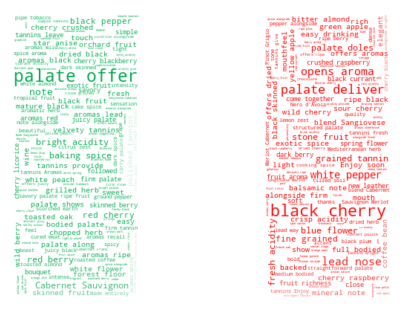

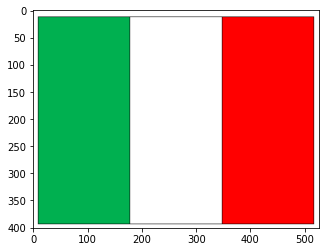

In [22]:
mask = np.array(Image.open("/content/word-cloud/italy.png"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(ita)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("ita_wine.png", format="png")
plt.show()

ita = mpimg.imread('/content/word-cloud/italy.png') 
plt.imshow(ita)

Creating a wordcloud with Spain flag

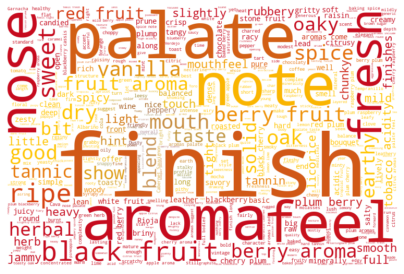

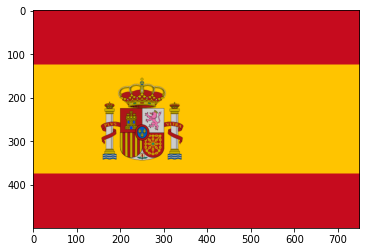

In [23]:
mask = np.array(Image.open("/content/word-cloud/spain.png"))
wordcloud_spa = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(spa)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("spa_wine.png", format="png")
plt.show()

spa = mpimg.imread('/content/word-cloud/spain.png') 
plt.imshow(spa)

Creating a wordcloud with Portugal flag

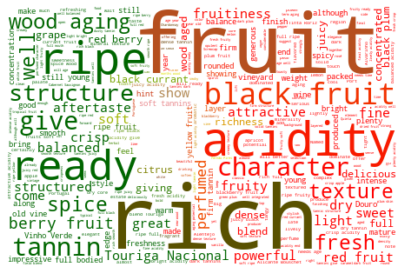

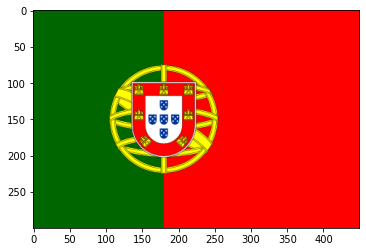

In [24]:
mask = np.array(Image.open("/content/word-cloud/portugal.png"))
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(por)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("por_wine.png", format="png")
plt.show()

por = mpimg.imread('/content/word-cloud/portugal.png') 
plt.imshow(por)